# Домашнее задание на проверку знаний библиотеки для анализа данных Pandas.

Вам представлен датасет, который содержит информацию по результатам сезона 2016 года игры в бейсбол.

Вам необходимо загрузить датасет (он находится в архиве с текущим домашним заданием). Провести его очистку, если это необходимо и ответить на поставленные аналитические
вопросы.

Список колонок, представленных в датасете:

---
* attendance        - количество зрителей матча
* away_team         - название гостевой команды
* away_team_errors  - количество ошибок гостевой команды
* away_team_hits    - количество хитов гостевой команды (хит в бейсболе - удар при котором отбивающий достиг первой базы)
* away_team_runs    - количество ранов гостевой команды (ран в бейсболе - очко заработанное игроком нападения)
* date              - дата проведения матча
* field_type        - тип игрового поля
* game_type         - тип игры
* home_team         - название домашней команды
* home_team_errors  - количество ошибок домашней команды
* home_team_hits    - количество хитов домашней команды (хит в бейсболе - удар при котором отбивающий достиг первой базы)
* home_team_runs    - количество ранов домашней команды (ран в бейсболе - очко заработанное игроком нападения)
* start_time        - время начала игрового матча
* venue             - название места проведения матча (стадион, поле, арена)
* day_of_week       - день недели проведения матча
* temperature       - температура воздуха в день проведения матча в фаренгейтах
* wind_speed        - скорость ветра в день проведения матча
* wind_direction    - направление скорости ветра
* sky               - облачность
* total_runs        - общее количество ранов для двух команд
* game_hours_dec    - длительность матча указаная в часах
* season            - тип игрового сезона
* home_team_win     - результат домашней команды (1 - выигрыш)
* home_team_loss    - результат домашней команды (0 - проигрыш)
* home_team_outcome - исход матча
---

Всего в задании 20 вопросов. За каждый правильный вопрос начисляется 5 баллов. Таким образом за все правильные ответы вы получите - 100 баллов. Оценка затем будет приведена к 10-ти бальной шкале.

---

**Кроме того, баллы могут быть снижены за**:

- 1 балл снижается за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность. Вывод старайтесь делать минимальным, так как первичная цель - сделать качественный анализ, чтобы быстро ответить на поставленный вопрос (никаких таблиц на 100 строк).


- 5 баллов снижается если ответ на домашнюю работу будет прислан в виде скриншота, ноутбука, текстового файла и прочих способов. Используйте при отправке на проверку только GitHub/GitLab либо прочий сервис. Присылать домашнюю работу необходимо ссылкой на ваш репозиторий на адрес электронной почты maratmovlamov2017@gmail.com


- за каждый день просрочки дедлайна снижается по 10 баллов. Один день - минус 10 баллов, второй день минус 10 баллов, третий день минус 10 баллов. Соблюдайте сроки и не приступайте к домашнему заданию в последний момент.

---

Удачи вам в поисках истинны :)

In [1]:
# Импортируйте все необходимые библиотеки и модули которые вам необходимы
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Загрузите датасет и проведите его очистку и форматирование если это необходимо
data=pd.read_csv("./files/baseball_games.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2463 non-null   int64  
 1   attendance         2460 non-null   float64
 2   away_team          2463 non-null   object 
 3   away_team_errors   2463 non-null   int64  
 4   away_team_hits     2463 non-null   int64  
 5   away_team_runs     2463 non-null   int64  
 6   date               2463 non-null   object 
 7   field_type         2463 non-null   object 
 8   game_type          2463 non-null   object 
 9   home_team          2463 non-null   object 
 10  home_team_errors   2463 non-null   int64  
 11  home_team_hits     2463 non-null   int64  
 12  home_team_runs     2463 non-null   int64  
 13  start_time         2463 non-null   object 
 14  venue              2463 non-null   object 
 15  day_of_week        2463 non-null   object 
 16  temperature        2463 

In [3]:
data.columns

Index(['Unnamed: 0', 'attendance', 'away_team', 'away_team_errors',
       'away_team_hits', 'away_team_runs', 'date', 'field_type', 'game_type',
       'home_team', 'home_team_errors', 'home_team_hits', 'home_team_runs',
       'start_time', 'venue', 'day_of_week', 'temperature', 'wind_speed',
       'wind_direction', 'sky', 'total_runs', 'game_hours_dec', 'season',
       'home_team_win', 'home_team_loss', 'home_team_outcome'],
      dtype='object')

In [4]:
#удалим первый столбец, так как он не несет в себе смысловой нагрузки
del data['Unnamed: 0']

In [5]:
#удаляем данные об играх, сыгранных в post season
data.drop(data[data['season']=='post season'].index, inplace = True)
#заполним матчи, где attendance NaN средним значением по столбцу attendance
data.fillna(value=data['attendance'].mean(), inplace=True)
data.head()

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,field_type,game_type,home_team,home_team_errors,...,temperature,wind_speed,wind_direction,sky,total_runs,game_hours_dec,season,home_team_win,home_team_loss,home_team_outcome
0,40030.0,New York Mets,1,7,3,2016-04-03,on grass,Night Game,Kansas City Royals,0,...,74.0,14.0,from Right to Left,Sunny,7,3.216667,regular season,1,0,Win
1,21621.0,Philadelphia Phillies,0,5,2,2016-04-06,on grass,Night Game,Cincinnati Reds,0,...,55.0,24.0,from Right to Left,Overcast,5,2.383333,regular season,1,0,Win
2,12622.0,Minnesota Twins,0,5,2,2016-04-06,on grass,Night Game,Baltimore Orioles,0,...,48.0,7.0,out to Leftfield,Unknown,6,3.183333,regular season,1,0,Win
3,18531.0,Washington Nationals,0,8,3,2016-04-06,on grass,Night Game,Atlanta Braves,1,...,65.0,10.0,from Right to Left,Cloudy,4,2.883333,regular season,0,1,Loss
4,18572.0,Colorado Rockies,1,8,4,2016-04-06,on grass,Day Game,Arizona Diamondbacks,0,...,77.0,0.0,in unknown direction,In Dome,7,2.650000,regular season,0,1,Loss


In [6]:
#напишем функцию, которая преобразует время начала игры в строку "%H:%M%PM"
def time_format(s):
    parts=s.split(' ')
    letters=parts[1].split('.')
    letters="".join(letters)
    new_time=parts[0]+letters.upper()
    return new_time

data['start_time']=data['start_time'].apply(time_format)

In [7]:
#создаем новый столбец где объединим и год и время начала игры
data['time']=data['date']+data['start_time']
data['time']

0        2016-04-037:38PM
1        2016-04-067:11PM
2        2016-04-067:07PM
3        2016-04-067:10PM
4       2016-04-0612:40PM
              ...        
2458     2016-04-034:09PM
2459     2016-04-031:15PM
2460    2016-04-0612:41PM
2461     2016-04-064:57PM
2462     2016-04-066:22PM
Name: time, Length: 2428, dtype: object

In [8]:
#преобразуем столбец data в тип datetime
data['date']=data['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
data['date']

0      2016-04-03
1      2016-04-06
2      2016-04-06
3      2016-04-06
4      2016-04-06
          ...    
2458   2016-04-03
2459   2016-04-03
2460   2016-04-06
2461   2016-04-06
2462   2016-04-06
Name: date, Length: 2428, dtype: datetime64[ns]

In [9]:
#преобразуем столбец time в тип datetime в формате %Y-%m-%d%H:%M%p
data['time']=data['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d%H:%M%p"))

data['time']

0      2016-04-03 07:38:00
1      2016-04-06 07:11:00
2      2016-04-06 07:07:00
3      2016-04-06 07:10:00
4      2016-04-06 12:40:00
               ...        
2458   2016-04-03 04:09:00
2459   2016-04-03 01:15:00
2460   2016-04-06 12:41:00
2461   2016-04-06 04:57:00
2462   2016-04-06 06:22:00
Name: time, Length: 2428, dtype: datetime64[ns]

# 1. На какую игру пришло максимальное количество зрителей за весь сезон игр?

In [10]:
data.loc[data['attendance'].idxmax()]

attendance                        53621.0
away_team            San Francisco Giants
away_team_errors                        1
away_team_hits                         11
away_team_runs                          2
date                  2016-09-20 00:00:00
field_type                       on grass
game_type                      Night Game
home_team             Los Angeles Dodgers
home_team_errors                        0
home_team_hits                          9
home_team_runs                          0
start_time                         7:10PM
venue                      Dodger Stadium
day_of_week                       Tuesday
temperature                          77.0
wind_speed                            6.0
wind_direction          out to Rightfield
sky                                Cloudy
total_runs                              2
game_hours_dec                        3.6
season                     regular season
home_team_win                           0
home_team_loss                    

# 2. Какая игра была самая холодная (temperature) за весь сезон?

In [11]:
data.loc[data['temperature'].idxmin()]

attendance                       32419.0
away_team               New York Yankees
away_team_errors                       1
away_team_hits                        13
away_team_runs                         8
date                 2016-04-09 00:00:00
field_type                      on grass
game_type                       Day Game
home_team                 Detroit Tigers
home_team_errors                       1
home_team_hits                         7
home_team_runs                         4
start_time                        1:10PM
venue                      Comerica Park
day_of_week                     Saturday
temperature                         31.0
wind_speed                          18.0
wind_direction        from Left to Right
sky                               Cloudy
total_runs                            12
game_hours_dec                  3.333333
season                    regular season
home_team_win                          0
home_team_loss                         1
home_team_outcom

# 3. Какая игра была самая теплая за весь сезон?

In [12]:
data.loc[data['temperature'].idxmax()]

attendance                         21753.0
away_team             San Francisco Giants
away_team_errors                         0
away_team_hits                           8
away_team_runs                           3
date                   2016-05-13 00:00:00
field_type                        on grass
game_type                       Night Game
home_team             Arizona Diamondbacks
home_team_errors                         0
home_team_hits                           8
home_team_runs                           1
start_time                          6:40PM
venue                          Chase Field
day_of_week                         Friday
temperature                          101.0
wind_speed                             9.0
wind_direction        in unknown direction
sky                                  Sunny
total_runs                               4
game_hours_dec                         3.0
season                      regular season
home_team_win                            0
home_team_l

# 4. Какая игра в сезоне была самая долгая по продолжительности матча?

In [13]:
data.loc[data['game_hours_dec'].idxmax()]

attendance                         45825.0
away_team                Cleveland Indians
away_team_errors                         0
away_team_hits                          15
away_team_runs                           2
date                   2016-07-01 00:00:00
field_type                         on turf
game_type                         Day Game
home_team                Toronto Blue Jays
home_team_errors                         2
home_team_hits                          11
home_team_runs                           1
start_time                          1:20PM
venue                        Rogers Centre
day_of_week                         Friday
temperature                           68.0
wind_speed                             0.0
wind_direction        in unknown direction
sky                                In Dome
total_runs                               3
game_hours_dec                    6.216667
season                      regular season
home_team_win                            0
home_team_l

# 5. Какая игра в сезоне была самая короткая по продолжительности матча?

In [14]:
data.loc[data['game_hours_dec'].idxmin()]

attendance                       19991.0
away_team                   Chicago Cubs
away_team_errors                       1
away_team_hits                         4
away_team_runs                         1
date                 2016-09-29 00:00:00
field_type                      on grass
game_type                     Night Game
home_team             Pittsburgh Pirates
home_team_errors                       0
home_team_hits                         2
home_team_runs                         1
start_time                        7:06PM
venue                           PNC Park
day_of_week                     Thursday
temperature                         63.0
wind_speed                          12.0
wind_direction         in from Leftfield
sky                             Overcast
total_runs                             2
game_hours_dec                      1.25
season                    regular season
home_team_win                          0
home_team_loss                         0
home_team_outcom

# 6. Сколько матчей в сезоне закончилось ничьей?

In [15]:
data[(data["home_team_win"]==0) & (data["home_team_loss"]==0)].shape[0]

1

# 7. Какая игра была последней в сезоне?

In [16]:
data_copy=data.copy()
data_copy.sort_values(by=['time'], ascending=False, inplace=True)
data_copy.iloc[0]

attendance                       24856.0
away_team              Oakland Athletics
away_team_errors                       0
away_team_hits                         7
away_team_runs                         3
date                 2016-10-02 00:00:00
field_type                      on grass
game_type                       Day Game
home_team               Seattle Mariners
home_team_errors                       0
home_team_hits                         6
home_team_runs                         2
start_time                       12:10PM
venue                       Safeco Field
day_of_week                       Sunday
temperature                         58.0
wind_speed                           1.0
wind_direction        out to Centerfield
sky                              Unknown
total_runs                             5
game_hours_dec                  2.566667
season                    regular season
home_team_win                          0
home_team_loss                         1
home_team_outcom

# 8. У какой игры было минимальное количество зрителей?

In [17]:
data.loc[data['attendance'].idxmin()]

attendance                        8766.0
away_team                 Detroit Tigers
away_team_errors                       0
away_team_hits                         5
away_team_runs                         0
date                 2016-05-04 00:00:00
field_type                      on grass
game_type                     Night Game
home_team              Cleveland Indians
home_team_errors                       0
home_team_hits                         5
home_team_runs                         4
start_time                        6:10PM
venue                  Progressive Field
day_of_week                    Wednesday
temperature                         54.0
wind_speed                          11.0
wind_direction        from Left to Right
sky                             Overcast
total_runs                             4
game_hours_dec                  2.316667
season                    regular season
home_team_win                          1
home_team_loss                         0
home_team_outcom

# 9. Какая игра в сезоне была самая ветренная?

In [18]:
data.loc[data['wind_speed'].idxmax()]

attendance                        41543.0
away_team               Milwaukee Brewers
away_team_errors                        1
away_team_hits                         11
away_team_runs                          5
date                  2016-06-13 00:00:00
field_type                       on grass
game_type                      Night Game
home_team            San Francisco Giants
home_team_errors                        0
home_team_hits                         14
home_team_runs                         11
start_time                         7:15PM
venue                           AT&T Park
day_of_week                        Monday
temperature                          58.0
wind_speed                           25.0
wind_direction         out to Centerfield
sky                                Cloudy
total_runs                             16
game_hours_dec                   3.633333
season                     regular season
home_team_win                           1
home_team_loss                    

# 10. В какой игре получили максимальное количество очков?

In [19]:
#data[['home_team_runs','away_team_runs']].max().idxmax() - находим, в каком из столбцов было большее количество ранов, в home_team_runs или в away_team_runs
#далее в этом столбце уже ищем номер максимального количества ранов и возвращаем эту строку
data.loc[data[data[['home_team_runs','away_team_runs']].max().idxmax()].idxmax()]

attendance                                 36552.0
away_team            Los Angeles Angels of Anaheim
away_team_errors                                 1
away_team_hits                                  22
away_team_runs                                  21
date                           2016-07-02 00:00:00
field_type                                on grass
game_type                               Night Game
home_team                           Boston Red Sox
home_team_errors                                 4
home_team_hits                                   8
home_team_runs                                   2
start_time                                  7:16PM
venue                                  Fenway Park
day_of_week                               Saturday
temperature                                   80.0
wind_speed                                    12.0
wind_direction                   out to Rightfield
sky                                         Cloudy
total_runs                     

# 11. Какая игра содержала максимальное количество ошибок домашней команды?

In [20]:
data.loc[data['home_team_errors'].idxmax()]

attendance                        22581.0
away_team            Arizona Diamondbacks
away_team_errors                        1
away_team_hits                         11
away_team_runs                          8
date                  2016-07-27 00:00:00
field_type                       on grass
game_type                      Night Game
home_team               Milwaukee Brewers
home_team_errors                        5
home_team_hits                          5
home_team_runs                          1
start_time                         7:10PM
venue                         Miller Park
day_of_week                     Wednesday
temperature                          77.0
wind_speed                            9.0
wind_direction          in from Leftfield
sky                                Cloudy
total_runs                              9
game_hours_dec                   2.933333
season                     regular season
home_team_win                           0
home_team_loss                    

# 12. В какой игре было максимальное количество хитов?

In [21]:
#data[['home_team_hits','away_team_hits']].max().idxmax() - находим, в каком из столбцов было большее количество хитов, в home_team_hits или в away_team_hits
#далее в этом столбце уже ищем номер максимального количества хитов и возвращаем эту строку
data.loc[data[data[['home_team_hits','away_team_hits']].max().idxmax()].idxmax()]

attendance                       36137.0
away_team                   Chicago Cubs
away_team_errors                       0
away_team_hits                        11
away_team_runs                         3
date                 2016-07-03 00:00:00
field_type                      on grass
game_type                       Day Game
home_team                  New York Mets
home_team_errors                       1
home_team_hits                        22
home_team_runs                        14
start_time                        1:12PM
venue                         Citi Field
day_of_week                       Sunday
temperature                         80.0
wind_speed                           3.0
wind_direction          out to Leftfield
sky                               Cloudy
total_runs                            17
game_hours_dec                  3.283333
season                    regular season
home_team_win                          1
home_team_loss                         0
home_team_outcom

# 13. Выведите количество игр которая сыграла каждая команда в данном сезоне?

In [22]:
#объединяем названия команд из столбцов home_team и away_team
teams=pd.concat([data["home_team"],data["away_team"]], ignore_index=True)

In [23]:
#все игравшие команды
teams.value_counts()

Kansas City Royals               162
Philadelphia Phillies            162
Los Angeles Dodgers              162
Boston Red Sox                   162
Chicago White Sox                162
San Francisco Giants             162
St. Louis Cardinals              162
Toronto Blue Jays                162
Washington Nationals             162
Colorado Rockies                 162
Chicago Cubs                     162
Houston Astros                   162
Minnesota Twins                  162
Cincinnati Reds                  162
New York Mets                    162
Seattle Mariners                 162
Milwaukee Brewers                162
New York Yankees                 162
Oakland Athletics                162
Pittsburgh Pirates               162
San Diego Padres                 162
Tampa Bay Rays                   162
Texas Rangers                    162
Arizona Diamondbacks             162
Baltimore Orioles                162
Los Angeles Angels of Anaheim    162
Miami Marlins                    161
D

# 14. Какая команда выиграла наибольшое количество матчей в сезоне? (Будьте внимательны с типом матча в сезоне - season).

In [24]:
#выделяем победы домашних команд
home_win=data[['home_team','home_team_win']]
#переименовываем столбцы, чтобы после объединить с гостевыми командами
home_win=home_win.rename(columns={"home_team": "team", "home_team_win": "win_number"})
#выделяем победы гостевых команд (это поражения домашних)
away_win=data[['away_team','home_team_loss']]
#переименовываем столбцы, чтобы после объединить с домашними командами
away_win=away_win.rename(columns={"away_team": "team", "home_team_loss": "win_number"})
#создаем объединенный датасет всех команд и всех их побед: и в качестве гостевой команды, и в качестве домашней
win=pd.concat([home_win,away_win], ignore_index=True)
#агрегируем по имени команды суммируя единицы в победах
win=win.groupby(by=['team']).sum()
#сортируем. верхняя команда - ответ
win.sort_values(by='win_number', ascending=False, inplace=True)
win.index[0]

'Chicago Cubs'

# 15. Какая команда выиграла наибольшее количество домашних матчей в сезоне?

In [25]:
#выделяем домашние команды и их победы
home_win=data[['home_team','home_team_win']]
home_win=home_win.groupby(by=['home_team']).sum()
#агрегируем их по названиям и суммируем количество побед
#сортируем. верхняя команда - ответ
home_win.sort_values(by='home_team_win', ascending=False,inplace=True)
home_win.index[0]

'Chicago Cubs'

# 16. Какая команда выиграла наибольшее количество гостевых матчей в сезоне?

In [26]:
#выделяем гостевые команды
away_win=data[['away_team','home_team_loss']]
away_win=away_win.groupby(by=['away_team']).sum()
#агрегируем их по названиям и суммируем количество побед
#сортируем. верхняя команда - ответ
away_win.sort_values(by='home_team_loss', ascending=False, inplace=True)
away_win.index[0]

'St. Louis Cardinals'

# 17. Какая команда проиграла наибольшее количество матчей в сезоне?

In [27]:
#команда, которая выиграла меньше всех игр - проиграла больше всех матчей в сезоне
#это последняя в списке команд
win.index[-1]

'Minnesota Twins'

# 18. Зависит ли выигрышь от количества посетителей матча? (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html)

In [28]:
win_attendance_data=data[['attendance','home_team_win']]
win_attendance_data.cov()

,attendance,home_team_win
attendance,9.555372e+07,242.504332
home_team_win,2.425043e+02,0.249199


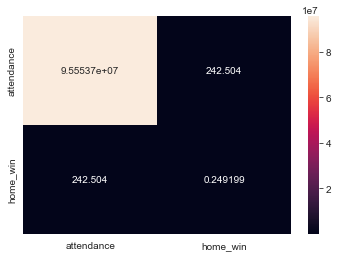

In [29]:
cov = win_attendance_data.cov()
labs = ['attendance', 'home_win']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [30]:
#посчитаем так же коэффициент корреляции
win_attendance_data.corr()

,attendance,home_team_win
attendance,1.000000,0.049696
home_team_win,0.049696,1.000000


In [31]:
#так как корреляция между home_team_win и attendance не равна нулю, то есть (слабая) зависимость

# 19. Правда ли что большинство проигрышных домашних матчей приходятся на Субботу и Воскресенье?

In [32]:
home_loss_days=data[data['home_team_loss']==1]['day_of_week']
home_loss_days.value_counts()
#ответ: не правда, это Воскресенье и Вторник

Sunday       189
Tuesday      185
Friday       181
Saturday     174
Wednesday    162
Monday       128
Thursday     121
Name: day_of_week, dtype: int64

# 20. Правда ли что наибольшее количество ранов происходит в холодную погоду? (Холодной погодой считается погода ниже 0 градусов)

In [33]:
#так как температура в Фаренгейтах, то переведем её в градусы Цельсия
def Far2Cel(F):
    return (F - 32)/1.8

In [34]:
data['temperature']=data['temperature'].apply(Far2Cel)

In [35]:
runs_temperature=data[['temperature','total_runs']]

[Text(0.5, 0, 'temperature'), Text(0, 0.5, 'runs')]

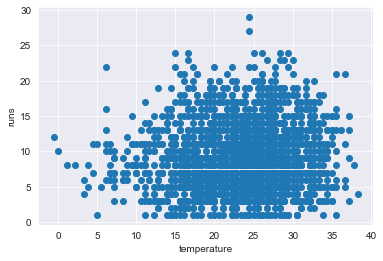

In [36]:
#нарисуем график зависимости ранов от температуры
figure, ax=plt.subplots()
ax.scatter(runs_temperature['temperature'],runs_temperature['total_runs'])
ax.set(xlabel='temperature', ylabel='runs')

In [37]:
#по графику видно, что в холодную погоду ранов не наибольшее количество